### Introduction to Convolutional Neural Networks
- Convolutional neural network to classify images based on digit from MNIST dataset
- Layout of convolutional neural network
    1. Input layer
    2. Convolutional (Feature Map) + Activation layer
    3. Pooling Layer
    4. Flattening layer
    5. Fully-Connected layer

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

In [2]:
# Data Collection
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Dimensions of GrayScale images
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


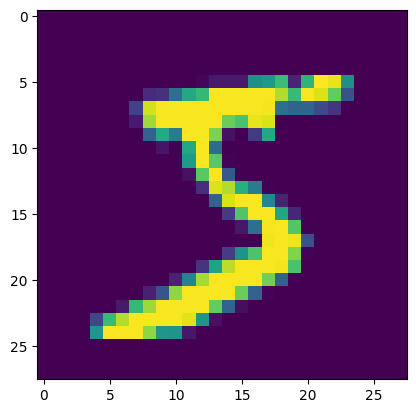

In [3]:
# Show 3D Images
plt.imshow(x_train[0])

In [4]:
# Data Pre-processing (Target feature)
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

features = x_train.shape[1]
num_classes = y_train.shape[1]

In [5]:
# Classification Model using keras
from keras.models import Sequential
from keras.layers import Input, Conv2D, Dense, MaxPool2D, Flatten

def classification_model():

    model = Sequential()
    # Model Hidden layers
    model.add(Input(shape = (features, features, 1))) # GrayScale Image
    model.add(Conv2D(16, kernel_size= (5, 5), strides= (1, 1), activation= 'relu'))
    model.add(MaxPool2D(pool_size= (2, 2), strides= (1, 1)))
    model.add(Conv2D(32, kernel_size= (5, 5), strides= (2, 2), activation= 'relu'))
    model.add(MaxPool2D(pool_size = (2, 2), strides= (1, 1)))

    # Image Flatten & Fully-Connected Layer
    model.add(Flatten())
    model.add(Dense(100, activation= 'relu'))
    model.add(Dense(num_classes, activation= 'softmax'))

    # Combining model
    model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

    return model


In [6]:
# Model Training and Evaluation
model = classification_model()

model.fit(x_train, y_train, validation_data= (x_test, y_test), batch_size= 200, epochs= 10, verbose= 2)

Epoch 1/10
300/300 - 9s - 30ms/step - accuracy: 0.8778 - loss: 1.8387 - val_accuracy: 0.9653 - val_loss: 0.1093
Epoch 2/10
300/300 - 3s - 8ms/step - accuracy: 0.9735 - loss: 0.0871 - val_accuracy: 0.9777 - val_loss: 0.0754
Epoch 3/10
300/300 - 4s - 15ms/step - accuracy: 0.9805 - loss: 0.0635 - val_accuracy: 0.9801 - val_loss: 0.0669
Epoch 4/10
300/300 - 2s - 5ms/step - accuracy: 0.9849 - loss: 0.0493 - val_accuracy: 0.9822 - val_loss: 0.0593
Epoch 5/10
300/300 - 2s - 6ms/step - accuracy: 0.9875 - loss: 0.0406 - val_accuracy: 0.9802 - val_loss: 0.0655
Epoch 6/10
300/300 - 2s - 6ms/step - accuracy: 0.9896 - loss: 0.0318 - val_accuracy: 0.9823 - val_loss: 0.0570
Epoch 7/10
300/300 - 2s - 6ms/step - accuracy: 0.9909 - loss: 0.0288 - val_accuracy: 0.9816 - val_loss: 0.0604
Epoch 8/10
300/300 - 2s - 6ms/step - accuracy: 0.9911 - loss: 0.0263 - val_accuracy: 0.9820 - val_loss: 0.0684
Epoch 9/10
300/300 - 1s - 5ms/step - accuracy: 0.9918 - loss: 0.0246 - val_accuracy: 0.9817 - val_loss: 0.0667

In [9]:
# Model Evaluation
prediction = model.evaluate(x_test, y_test, verbose= 2)

313/313 - 1s - 2ms/step - accuracy: 0.9822 - loss: 0.0731


In [11]:
print(f'Model Accuracy: {np.round(prediction[1] * 100, 2)}')

Model Accuracy: 98.22
